In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_path = 'D:/xray/train'
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(128,128),batch_size=32,
                                              color_mode="rgb",class_mode = 'binary')

Found 4192 images belonging to 2 classes.


In [3]:
test_path = 'D:/xray/test'
test_set = test_datagen.flow_from_directory(directory=test_path,target_size=(128,128),
                                             batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [4]:
val_path = 'D:/xray/val'
val_set = val_datagen.flow_from_directory(directory=val_path,target_size=(128,128),
                                             batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 1005 images belonging to 2 classes.


In [5]:
print(test_set.class_indices)

{'normal': 0, 'opacity': 1}


In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_set, validation_data=[val_set], epochs=5, batch_size =32)


Epoch 1/5
131/131 [==============================] - 135s 1s/step - loss: 0.5425 - accuracy: 0.7510 - val_loss: 0.5366 - val_accuracy: 0.7483
Epoch 2/5
131/131 [==============================] - 103s 788ms/step - loss: 0.2942 - accuracy: 0.8781 - val_loss: 0.4612 - val_accuracy: 0.7721
Epoch 3/5
131/131 [==============================] - 98s 745ms/step - loss: 0.2266 - accuracy: 0.9129 - val_loss: 0.4501 - val_accuracy: 0.8826
Epoch 4/5
131/131 [==============================] - 97s 738ms/step - loss: 0.2726 - accuracy: 0.8969 - val_loss: 0.4206 - val_accuracy: 0.8090
Epoch 5/5
131/131 [==============================] - 99s 757ms/step - loss: 0.2202 - accuracy: 0.9148 - val_loss: 0.3211 - val_accuracy: 0.8716


In [9]:
model.save("normal&pneumonia.h5")

In [10]:
test_accu_CNN = model.evaluate(test_set)
print('The testing accuracy is :',test_accu_CNN[1]*100, '%')

21/21 [==============================] - 9s 428ms/step - loss: 0.4544 - accuracy: 0.7837
The testing accuracy is : 78.36538553237915 %


In [12]:
y_predict = model.predict(test_set)
y_predict


21/21 [==============================] - 7s 331ms/step


array([[0.9986102 ],
       [0.9561726 ],
       [0.47024885],
       [0.56623626],
       [0.5529953 ],
       [0.9024543 ],
       [0.903755  ],
       [0.9989764 ],
       [0.959341  ],
       [0.15887584],
       [0.09922008],
       [0.667098  ],
       [0.9014244 ],
       [0.6546793 ],
       [0.68001956],
       [0.3586014 ],
       [0.6853147 ],
       [0.7840091 ],
       [0.76666886],
       [0.992511  ],
       [0.90411246],
       [0.89394397],
       [0.69956183],
       [0.44359463],
       [0.994252  ],
       [0.66007555],
       [0.9732367 ],
       [0.9383862 ],
       [0.8398276 ],
       [0.7719578 ],
       [0.63183373],
       [0.25461167],
       [0.88340217],
       [0.47018376],
       [0.952734  ],
       [0.8076767 ],
       [0.8441027 ],
       [0.5738536 ],
       [0.986668  ],
       [0.7998121 ],
       [0.1326172 ],
       [0.3688203 ],
       [0.29587242],
       [0.8851243 ],
       [0.46701813],
       [0.02421823],
       [0.53136116],
       [0.089

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array 

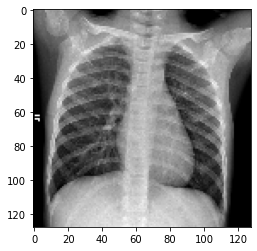

In [54]:
test_image =load_img("D:/xray/train/normal/IM-0147-0001.jpeg", target_size = (128,128))
 
plt.imshow(test_image)
plt.show()

In [55]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis =0)
model = load_model("normal&pneumonia.h5")
np.vstack([test_image])
result = model.predict(test_image,verbose=1)
print(result)
result = result[0][0]
if result == 0:
        print( 'normal')
        
else:
        print( 'opacity')
       

1/1 [==============================] - 0s 56ms/step
[[0.]]
normal
